In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as ski
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
%load_ext autoreload
%autoreload 2

In [25]:
data = pd.read_csv("Data/HEMODB.csv",sep=';')

In [26]:

data.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15'],axis=1,inplace=True)
data.head()

,ID,Brachial SBP,Brachial DBP,Brachial PP,MAP,Heart rate,Carotid-to-femoral PWV,Stroke volume,Ejection fraction,Central SBP,End-systolic elastance,End-diastolic elastance,Ejection duration
0,1,98.328,73.229,25.098,81.595,85.608,6.2060,50.896,48.893,91.399,314000000.0,15600000.0,0.15849
1,2,87.134,64.596,22.538,72.109,74.166,5.8806,51.110,48.303,80.663,269000000.0,18800000.0,0.15855
2,3,85.728,65.301,20.427,72.110,86.010,6.0619,45.413,41.588,79.826,220000000.0,18800000.0,0.16826
3,4,87.308,68.627,18.681,74.854,NaN,5.9547,45.091,39.257,81.771,204000000.0,16500000.0,0.18353
4,5,83.572,65.532,18.040,71.545,97.197,5.7352,41.302,39.403,78.667,219000000.0,17300000.0,0.11478


In [4]:
#Managing NaN values 
NaN_values=data.isna().any()
columns_with_NaN=data.columns[NaN_values].tolist()
print(columns_with_NaN)

#replace the missing value with the mean 
for to_replace in enumerate(columns_with_NaN):
    #compute the mean of the column where NaN have to be replaced
    mean=data[columns_with_NaN].mean()
    data[columns_with_NaN]=data[columns_with_NaN].replace(np.nan,mean)
print(data)


['Heart rate']
        ID  Brachial SBP  Brachial DBP  Brachial PP     MAP  Heart rate  \
0        1        98.328        73.229       25.098  81.595   85.608000   
1        2        87.134        64.596       22.538  72.109   74.166000   
2        3        85.728        65.301       20.427  72.110   86.010000   
3        4        87.308        68.627       18.681  74.854   82.570492   
4        5        83.572        65.532       18.040  71.545   97.197000   
...    ...           ...           ...          ...     ...         ...   
4013  4014       169.200        59.184      110.020  95.856   90.499000   
4014  4015       149.840        49.120      100.720  82.694   90.460000   
4015  4016       155.220        48.294      106.930  83.937   80.327000   
4016  4017       164.350        62.557      101.800  96.489   93.305000   
4017  4018       145.850        47.502       98.346  80.284   94.579000   

      Carotid-to-femoral PWV  Stroke volume  Ejection fraction  Central SBP  \
0    

In [12]:
#Removal of the unused features, keeping brSBP, brDBP, HR and cfPWV
u_features={'brSBP':data['Brachial SBP'],'brDBP':data['Brachial DBP'],'HR':data['Heart rate'],'cfPWV':data['Carotid-to-femoral PWV']}
used_features=pd.DataFrame(u_features)

#Second set of used features, adding EF
u2_features={'brSBP':data['Brachial SBP'],'brDBP':data['Brachial DBP'],'HR':data['Heart rate'],'cfPWV':data['Carotid-to-femoral PWV'],'EF':data['Ejection fraction']}
used2_features=pd.DataFrame(u2_features)

#Creating csv datafiles
U1_PATH='Data/u1.csv'
U2_PATH='Data/u2.csv'

used_features.to_csv(U1_PATH,sep=',')
used2_features.to_csv(U2_PATH,sep=',')

### Create csv file with the true EES values

In [23]:
t_EES={'EES':data['End-systolic elastance']}
true_EES=pd.DataFrame(t_EES)
T_EES_PATH = 'Data/true_ees.csv'
true_EES.to_csv(T_EES_PATH, sep=',')

# Random Forest

In [6]:
#Random Forest Regressor
max_depth=[5,10,20]
n_estimators=[500,700,1000]
N=len(max_depth)*len(n_estimators)

used_features = pd.read_csv("Data/u2.csv")
pred_data = pd.read_csv("Data/true_ees.csv")
y = pred_data.to_numpy()[:,1]

#Array to store the end-systolic predictions for each combination of hyperparameters 
esE=np.zeros((len(used_features),N))


In [9]:
i=0
for m in enumerate (max_depth):
    for n in enumerate (n_estimators):
       # y=data['End-systolic elastance']
        x=used_features
        regressor=RandomForestRegressor(n[1],max_depth=m[1])
        regressor.fit(used_features,y)
        y_predict=regressor.predict(used_features)
        esE[:,i]=y_predict
        i+=1
        print(y_predict)
        print(regressor.score(used_features,y))

[3.28283260e+08 2.83393103e+08 2.32491499e+08 ... 3.30872906e+08
 2.69635792e+08 3.19493972e+08]
0.8342609619929351
[3.28344879e+08 2.83661946e+08 2.33825635e+08 ... 3.30921935e+08
 2.69810208e+08 3.19677539e+08]
0.8345082394809955
[3.28072282e+08 2.83498000e+08 2.34536261e+08 ... 3.30770700e+08
 2.69505478e+08 3.20243475e+08]
0.8346155900918619
[3.18829435e+08 2.69686851e+08 2.29544862e+08 ... 3.67845921e+08
 2.61879250e+08 3.57545647e+08]
0.9525234253371708
[3.19550442e+08 2.69260224e+08 2.30318613e+08 ... 3.67367660e+08
 2.62565727e+08 3.55028185e+08]
0.9523478383039796
[3.19604883e+08 2.69259986e+08 2.29916005e+08 ... 3.67675433e+08
 2.62525496e+08 3.57036516e+08]
0.9526228984866663
[3.18241814e+08 2.69046000e+08 2.27096000e+08 ... 3.71186000e+08
 2.61478000e+08 3.58674000e+08]
0.9841095701991578
[3.16621040e+08 2.69610000e+08 2.27517143e+08 ... 3.73700000e+08
 2.61357143e+08 3.58491429e+08]
0.984039804171371
[3.17688529e+08 2.69020000e+08 2.26922000e+08 ... 3.73719000e+08
 2.62732

In [16]:
RFR_PATH='Data/RFR_Pred.csv'
esE_csv=pd.DataFrame(esE,columns=['(5,500)','(10,700)','(5,1000)','(10,500)','(10,700)','(10,1000)','(20,500)','(20,700)','(20,1000)'])
esE_csv.to_csv(RFR_PATH,sep=',')

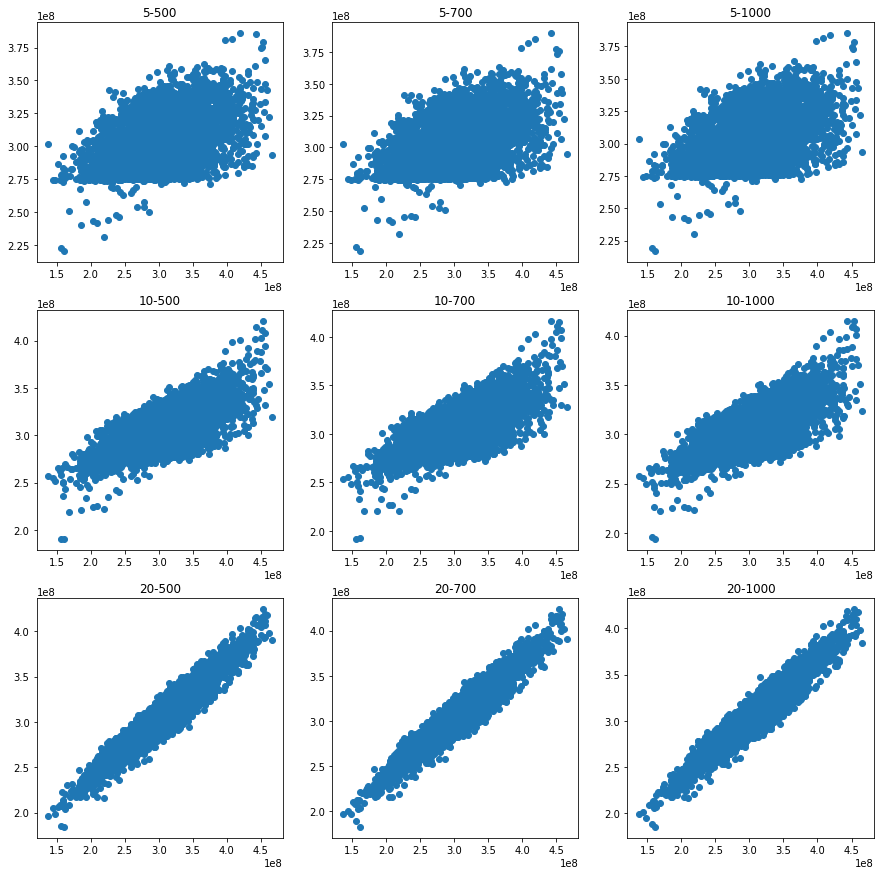

In [32]:
##### RFR_pred = pd.read_csv("Data/RFR_Pred.csv")
RFR_p = RFR_pred.to_numpy()
data = pd.read_csv('Data/HEMODB.csv', sep=';')
data = data.to_numpy()
true_var = data[:,10]

plt.close('all')
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.scatter(true_var, RFR_p[:,1])
plt.title('5-500')

plt.subplot(332)
plt.scatter(true_var, RFR_p[:,2])
plt.title('5-700')

plt.subplot(333)
plt.scatter(true_var, RFR_p[:,3])
plt.title('5-1000')

plt.subplot(334)
plt.scatter(true_var, RFR_p[:,4])
plt.title('10-500')

plt.subplot(335)
plt.scatter(true_var, RFR_p[:,5])
plt.title('10-700')

plt.subplot(336)
plt.scatter(true_var, RFR_p[:,6])
plt.title('10-1000')

plt.subplot(337)
plt.scatter(true_var, RFR_p[:,7])
plt.title('20-500')

plt.subplot(338)
plt.scatter(true_var, RFR_p[:,8])
plt.title('20-700')

plt.subplot(339)
plt.scatter(true_var, RFR_p[:,9])
plt.title('20-1000')

plt.show()

In [37]:
r = []
for i in range(1,10):
    r = np.corrcoef(true_var, RFR_p[:,i])
    print(r)

[[1.         0.45093273]
 [0.45093273 1.        ]]
[[1.         0.45181509]
 [0.45181509 1.        ]]
[[1.         0.45137312]
 [0.45137312 1.        ]]
[[1.        0.7166524]
 [0.7166524 1.       ]]
[[1.         0.71704294]
 [0.71704294 1.        ]]
[[1.         0.72100337]
 [0.72100337 1.        ]]
[[1.         0.95852008]
 [0.95852008 1.        ]]
[[1.         0.95811195]
 [0.95811195 1.        ]]
[[1.        0.9583284]
 [0.9583284 1.       ]]


# Support Vector Regressor

In [30]:
#Support Vector Regressor
C=[1,10,100]
gamma=[0.001,0.01,0.1,1]

from sklearn.svm import SVR

pred_data = pd.read_csv("Data/true_ees.csv")
y = pred_data.to_numpy()[:,1]

data = pd.read_csv("Data/u2.csv")
X = data.to_numpy()

x_tr, y_tr, x_te, y_te = split_data(X, y, 0.8, seed=1)


regressor = SVR(kernel = 'linear', C=10, gamma=0.001)
regressor.fit(x_tr,y_tr)

y_pred = regressor.predict(x_te)
r = np.corrcoef(y_te, y_pred)[0,1]


In [31]:
print(r)

0.3085592573198128


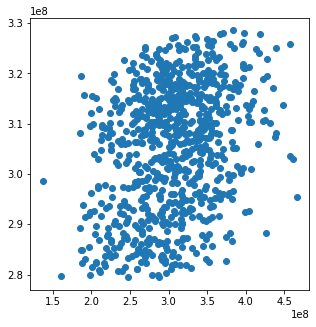

In [32]:
plt.close('all')
plt.figure(figsize=(5,5))
plt.scatter(y_te,y_pred)
plt.show()

# Ridge Regression

In [38]:
#Ridge Regression
#alpha=[1,10,100,200] from paper
alpha=[0.001,0.01, 0.1]


from sklearn.linear_model import Ridge
import sklearn.metrics

pred_data = pd.read_csv("Data/true_ees.csv")
y = pred_data.to_numpy()[:,1]

data = pd.read_csv("Data/u2.csv")
X = data.to_numpy()

x_tr, y_tr, x_te, y_te = split_data(X, y, 0.8, seed=1)

best_R2 = np.zeros(len(alpha))
best_r = np.zeros(len(alpha))

for i, a in enumerate(alpha):
    rid = Ridge(alpha=a)
    rid.fit(x_tr,y_tr)
    y_pred = rid.predict(x_te)
    best_R2[i] = rid.score(x_tr,y_tr)
    best_r[i]= np.corrcoef(y_te, y_pred)[0,1]
    print('alpha={}, R_squared={}, correlation_r={}'.format(a, best_R2[i],best_r[i]))
    
j1 = np.argmax(best_R2)
j2 = np.argmax(best_r)
if j1 == j1:
    print('Best parameters: alpha={}, R_squared={}, correlation_r={}'.format(alpha[j1], best_R2[j1],best_r[j1]))
else:
    print('Problem...')

    
print('RMSE = ', sklearn.metrics.mean_squared_error(y_te, y_pred))

alpha=0.001, R_squared=0.8215410507372629, correlation_r=0.8984382872173202
alpha=0.01, R_squared=0.8215410507314319, correlation_r=0.8984382287092694
alpha=0.1, R_squared=0.8215410501486184, correlation_r=0.8984376434642057
Best parameters: alpha=0.001, R_squared=0.8215410507372629, correlation_r=0.8984382872173202
RMSE =  551480660219412.6


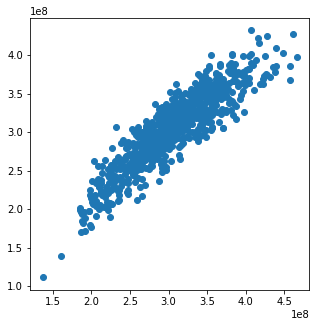

In [36]:
plt.close('all')
plt.figure(figsize=(5,5))
plt.scatter(y_te,y_pred)
plt.show()

# Gradient Boosting

In [11]:
#Gradient Boosting
learning_rate=[0.01,0.05,1]
n_estimators=[100,500,1000,1750]